In [383]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import torch.nn as nn
import torch
import torch, torch.nn as nn, torch.nn.functional as F
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from torch.autograd import Variable
import seaborn as sns
import matplotlib.gridspec as gridspec
from torch.utils.data.dataset import Dataset
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.manifold import TSNE
import imblearn
from torch.utils.data import TensorDataset, DataLoader
from imblearn.over_sampling import SMOTE
from torchsummary import summary
import warnings
warnings.filterwarnings('ignore')

Reading data from the file

In [384]:
df = pd.read_excel("CreditCardDataset.xlsx")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57350,172751,2.085387,-0.033624,-1.706889,-0.015100,0.644669,-0.245303,0.125758,-0.156508,0.277994,...,0.256304,0.862281,-0.063211,0.143339,0.361885,-0.124856,-0.025472,-0.066836,2.27,0
57351,172760,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
57352,172768,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0
57353,172770,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0


In [385]:
df.head

<bound method NDFrame.head of          Time        V1        V2        V3        V4        V5        V6  \
0           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
1           2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
2           7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
3          11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
4          12 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
...       ...       ...       ...       ...       ...       ...       ...   
57350  172751  2.085387 -0.033624 -1.706889 -0.015100  0.644669 -0.245303   
57351  172760 -6.713826  2.369104 -3.534768 -0.368259 -1.721030 -1.322808   
57352  172768 -2.076175  2.142238 -2.522704 -1.888063  1.982785  3.732950   
57353  172770  2.007418 -0.280235 -0.208113  0.335261 -0.715798 -0.751373   
57354  172777 -1.266580 -0.400461  0.956221 -0.723919  1.531993 -1.788600   

             V7        V8        V9  ...     

In [386]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [387]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

From above, we can see that there are no null values in the dataframe.

In [388]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count     56863.000000
mean      94697.024181
std       47485.699706
min           2.000000
25%       54044.000000
50%       84687.000000
75%      139238.000000
max      172777.000000
Name: Time, dtype: float64


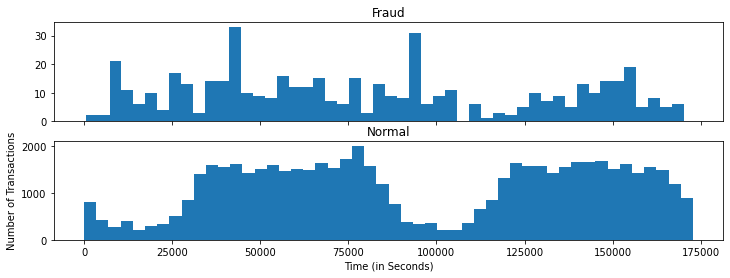

In [389]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [390]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    56863.000000
mean        88.536709
std        279.670869
min          0.000000
25%          5.540000
50%         22.000000
75%         76.230000
max      25691.160000
Name: Amount, dtype: float64


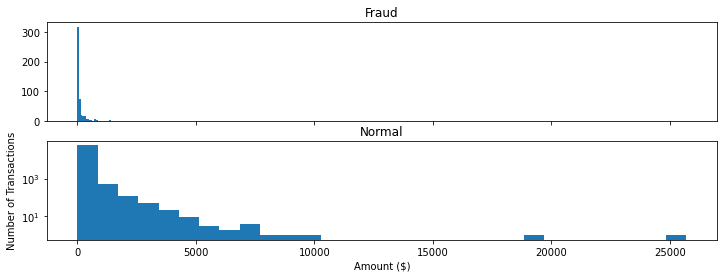

In [391]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

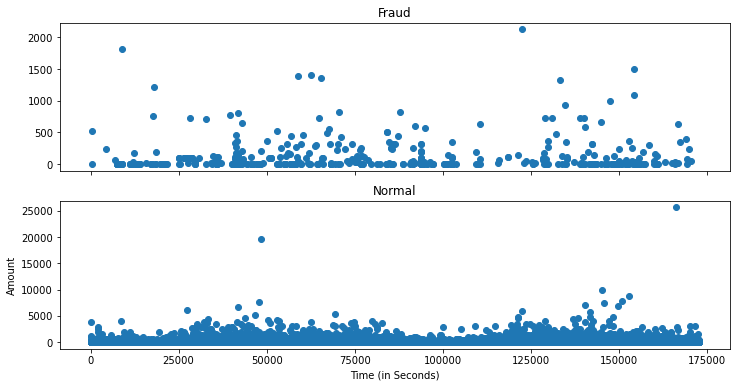

In [392]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<AxesSubplot:xlabel='Time', ylabel='Amount'>

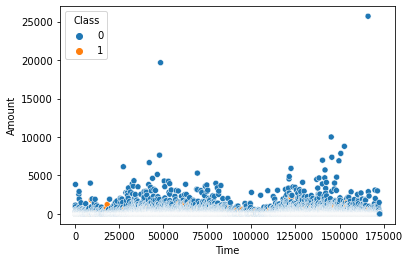

In [393]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df)

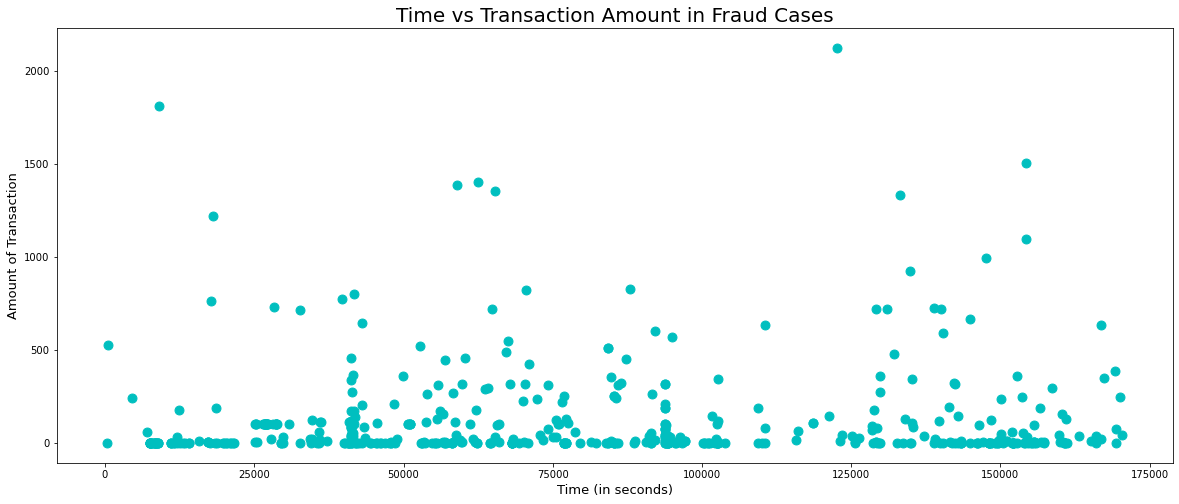

In [394]:
plt.figure(figsize=(20,8))

fig = plt.scatter(x=df[df['Class'] == 1]['Time'], y=df[df['Class'] == 1]['Amount'], color="c", s=80)
plt.title("Time vs Transaction Amount in Fraud Cases", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

From above we can see that there is very less data from Class 1.

<AxesSubplot:xlabel='Class', ylabel='count'>

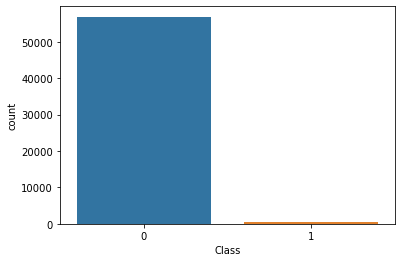

In [395]:
sns.countplot(df.Class)

From the above, it is clearly visible that there is imbalance in the data. There are 56,863 rows of data for class 0 and only 492 rows for class 1. So, now if we train a model with the current dataframe, the model will try to categorize all the test data as class 0 due to lack of class 1 data. Even though it might be seen that the model will result in very high accuracy because it will categorize all the data as class 0, it will not be helpful as the main purpose for the model is to detect frauds. So it is important to overcome the data imbalance.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.800000,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.500000,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113721,141291,-6.150561,-2.214977,-4.879920,2.398516,-0.703905,-0.439505,-3.942422,2.126959,-1.989473,...,1.327409,1.171840,-1.434285,-1.462864,-0.268955,0.109861,0.890120,-0.629968,190.275622,1
113722,149308,-0.844862,0.101098,-2.505312,2.854631,3.911474,-2.599786,-0.181131,0.044664,-0.889288,...,-0.033718,-0.471112,0.072322,-0.527275,0.285748,-0.307942,0.016713,0.125700,3.691187,1
113723,77160,-0.665180,0.724242,0.880042,0.048689,-0.197279,-0.608361,0.668844,0.072021,-0.189720,...,0.068690,0.109671,-0.114957,0.191932,-0.147916,0.282650,-0.037644,0.021456,111.093645,1
113724,35969,-4.218759,4.745006,-4.924376,5.611452,-4.228483,-1.270093,-6.832728,3.099393,-5.029612,...,1.589729,0.580812,-0.143707,-0.022994,0.049773,0.329030,0.575919,0.450308,23.860695,1


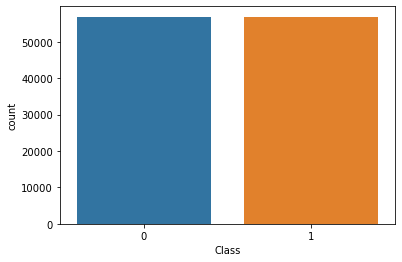

In [396]:
X=df.drop('Class', axis=1)
y=df['Class']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
sns.countplot(y)
df = pd.concat([X,y],axis = 1)
df

I chose SMOTE to encounter the data imbalance issue. 

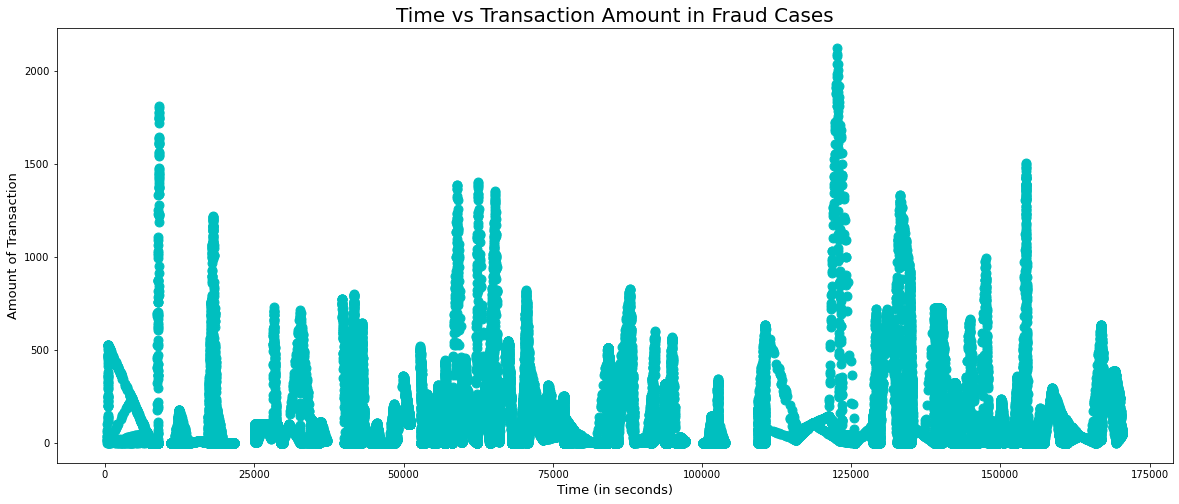

In [397]:
plt.figure(figsize=(20,8))

fig = plt.scatter(x=df[df['Class'] == 1]['Time'], y=df[df['Class'] == 1]['Amount'], color="c", s=80)
plt.title("Time vs Transaction Amount in Fraud Cases", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Amount'>

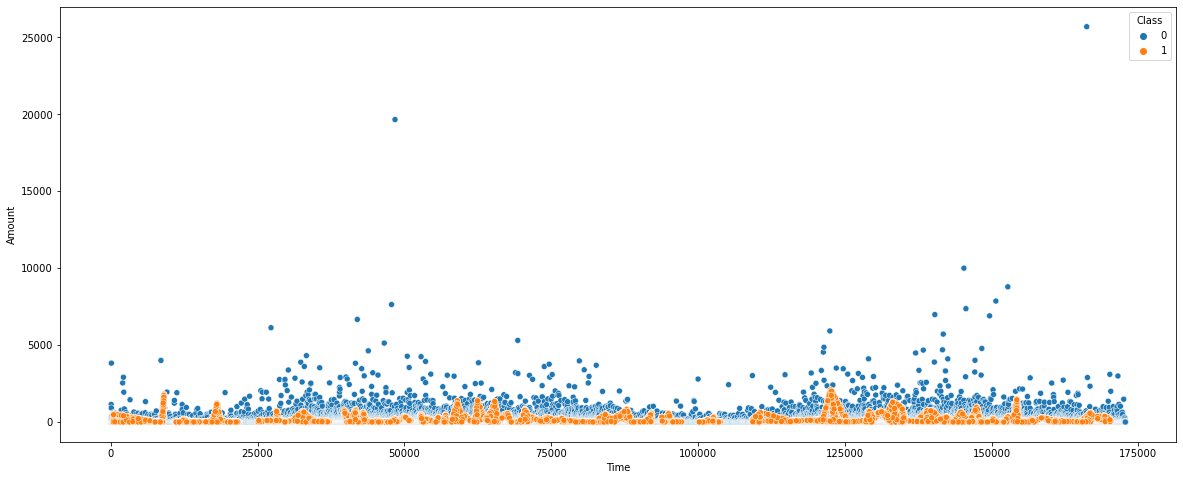

In [399]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df)

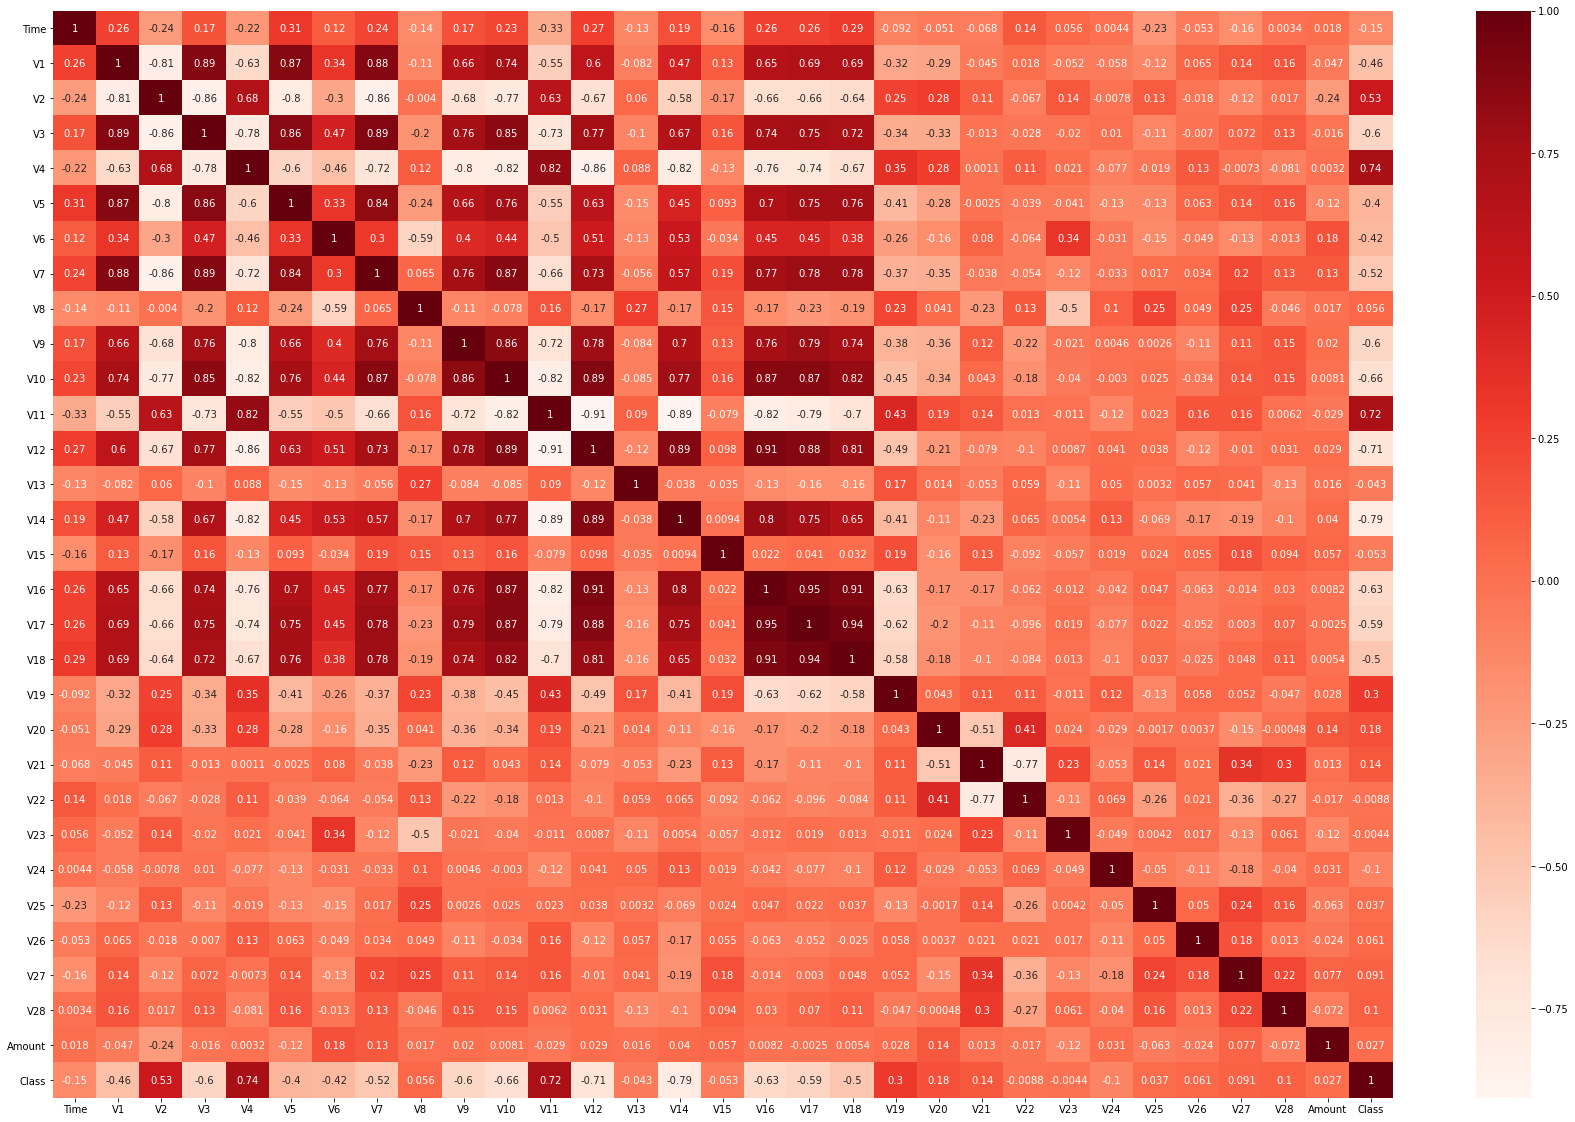

In [364]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

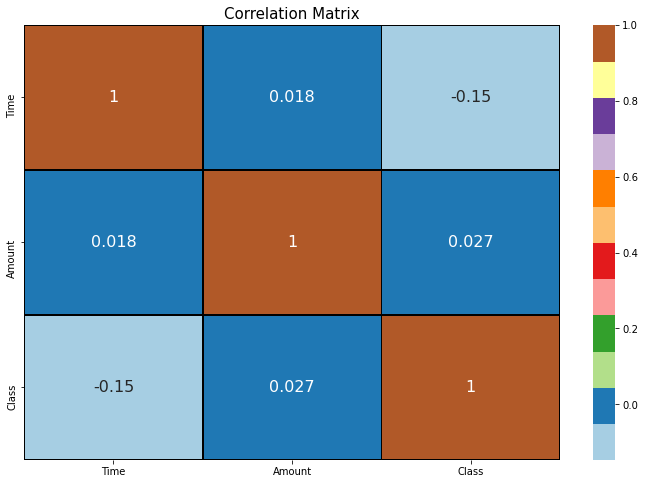

In [380]:
plt.subplots(figsize=(12,8))
plt.title("Correlation Matrix", fontsize=15)
sns.heatmap(df[['Time', 'Amount','Class']].corr(),linewidths=0.5, cmap="Paired", linecolor='black',annot=True, annot_kws={'size':16},);

In [365]:
class CreditCard(Dataset):

    def __init__(self, data):
        self.data = data
           
    def __getitem__(self, index):
        item = self.data.iloc[index].values
        return (item[0:30].astype(np.float32), item[30].astype(np.int))

    def __len__(self):
        return self.data.shape[0]

In [366]:
def get_datasets(train_ratio=0.80):

#     labels = {'class': label_idx}
    data = df
#     data.replace(labels, inplace=True)

    train_df = data.sample(frac=train_ratio, random_state=3)
    test_df = data.loc[~data.index.isin(train_df.index), :]

    return CreditCard(train_df), CreditCard(test_df)

In [402]:
class CreditNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(CreditNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [403]:
model = CreditNet(30, 100, 50, 2)
print(model)

CreditNet(
  (fc1): Linear(in_features=30, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


In [404]:
batch_size = 128

In [405]:
train_ds, test_ds = get_datasets()
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))

train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)
train_loader

# instances in training set:  90981
# instances in testing/validation set:  22745


In [406]:
net = CreditNet(30, 100, 50, 2)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  

In [ ]:
num_epochs = 5

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        items = Variable(items.float())
        classes = Variable(classes.long())
        
        net.train()           
        
        optimizer.zero_grad() 
        outputs = net(items)  
        loss = criterion(outputs, classes) 
        loss.backward()       
        optimizer.step()      
        
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data))

    net.eval()                 
    
    train_loss.append(loss.data)

    train_accuracy.append((100 * train_correct / train_total))
    
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:30])
    test_classes = torch.LongTensor(test_ds.data.values[:, 30])

    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    test_loss.append(loss.data)
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))

Epoch 1/5, Iteration 1/710, Loss: 609.3623
Epoch 1/5, Iteration 2/710, Loss: 161123904.0000
Epoch 1/5, Iteration 3/710, Loss: 1289.9438
Epoch 1/5, Iteration 4/710, Loss: 569.4354
Epoch 1/5, Iteration 5/710, Loss: 135275104.0000
Epoch 1/5, Iteration 6/710, Loss: 6929022957125632.0000
Epoch 1/5, Iteration 7/710, Loss: 15291659264.0000
Epoch 1/5, Iteration 8/710, Loss: 1.1323
Epoch 1/5, Iteration 9/710, Loss: 1.0454
Epoch 1/5, Iteration 10/710, Loss: 0.8918
Epoch 1/5, Iteration 11/710, Loss: 0.8149
Epoch 1/5, Iteration 12/710, Loss: 0.7417
Epoch 1/5, Iteration 13/710, Loss: 0.6815
Epoch 1/5, Iteration 14/710, Loss: 0.7282
Epoch 1/5, Iteration 15/710, Loss: 0.6822
Epoch 1/5, Iteration 16/710, Loss: 0.6935
Epoch 1/5, Iteration 17/710, Loss: 0.6906
Epoch 1/5, Iteration 18/710, Loss: 0.6971
Epoch 1/5, Iteration 19/710, Loss: 0.6920
Epoch 1/5, Iteration 20/710, Loss: 0.6886
Epoch 1/5, Iteration 21/710, Loss: 0.6948
Epoch 1/5, Iteration 22/710, Loss: 0.6921
Epoch 1/5, Iteration 23/710, Loss: 0.

Epoch 1/5, Iteration 198/710, Loss: 0.6932
Epoch 1/5, Iteration 199/710, Loss: 0.6932
Epoch 1/5, Iteration 200/710, Loss: 0.6932
Epoch 1/5, Iteration 201/710, Loss: 0.6931
Epoch 1/5, Iteration 202/710, Loss: 0.6932
Epoch 1/5, Iteration 203/710, Loss: 0.6932
Epoch 1/5, Iteration 204/710, Loss: 0.6931
Epoch 1/5, Iteration 205/710, Loss: 0.6931
Epoch 1/5, Iteration 206/710, Loss: 0.6931
Epoch 1/5, Iteration 207/710, Loss: 0.6931
Epoch 1/5, Iteration 208/710, Loss: 0.6931
Epoch 1/5, Iteration 209/710, Loss: 0.6931
Epoch 1/5, Iteration 210/710, Loss: 0.6931
Epoch 1/5, Iteration 211/710, Loss: 0.6932
Epoch 1/5, Iteration 212/710, Loss: 0.6931
Epoch 1/5, Iteration 213/710, Loss: 0.6932
Epoch 1/5, Iteration 214/710, Loss: 0.6930
Epoch 1/5, Iteration 215/710, Loss: 0.6927
Epoch 1/5, Iteration 216/710, Loss: 0.6929
Epoch 1/5, Iteration 217/710, Loss: 0.6929
Epoch 1/5, Iteration 218/710, Loss: 0.6931
Epoch 1/5, Iteration 219/710, Loss: 0.6930
Epoch 1/5, Iteration 220/710, Loss: 0.6931
Epoch 1/5, 

Epoch 1/5, Iteration 390/710, Loss: 0.6932
Epoch 1/5, Iteration 391/710, Loss: 0.6934
Epoch 1/5, Iteration 392/710, Loss: 0.6929
Epoch 1/5, Iteration 393/710, Loss: 0.6930
Epoch 1/5, Iteration 394/710, Loss: 0.6930
Epoch 1/5, Iteration 395/710, Loss: 0.6932
Epoch 1/5, Iteration 396/710, Loss: 0.6929
Epoch 1/5, Iteration 397/710, Loss: 0.6930
Epoch 1/5, Iteration 398/710, Loss: 0.6932
Epoch 1/5, Iteration 399/710, Loss: 0.6937
Epoch 1/5, Iteration 400/710, Loss: 0.6931
Epoch 1/5, Iteration 401/710, Loss: 0.6935
Epoch 1/5, Iteration 402/710, Loss: 0.6934
Epoch 1/5, Iteration 403/710, Loss: 0.6934
Epoch 1/5, Iteration 404/710, Loss: 0.6930
Epoch 1/5, Iteration 405/710, Loss: 0.6934
Epoch 1/5, Iteration 406/710, Loss: 0.6931
Epoch 1/5, Iteration 407/710, Loss: 0.6931
Epoch 1/5, Iteration 408/710, Loss: 0.6931
Epoch 1/5, Iteration 409/710, Loss: 0.6930
Epoch 1/5, Iteration 410/710, Loss: 0.6931
Epoch 1/5, Iteration 411/710, Loss: 0.6934
Epoch 1/5, Iteration 412/710, Loss: 0.6931
Epoch 1/5, 

Epoch 1/5, Iteration 586/710, Loss: 0.6929
Epoch 1/5, Iteration 587/710, Loss: 0.6935
Epoch 1/5, Iteration 588/710, Loss: 0.6933
Epoch 1/5, Iteration 589/710, Loss: 0.6929
Epoch 1/5, Iteration 590/710, Loss: 0.6930
Epoch 1/5, Iteration 591/710, Loss: 0.6932
Epoch 1/5, Iteration 592/710, Loss: 0.6936
Epoch 1/5, Iteration 593/710, Loss: 0.6931
Epoch 1/5, Iteration 594/710, Loss: 0.6933
Epoch 1/5, Iteration 595/710, Loss: 0.6934
Epoch 1/5, Iteration 596/710, Loss: 0.6932
Epoch 1/5, Iteration 597/710, Loss: 0.6933
Epoch 1/5, Iteration 598/710, Loss: 0.6931
Epoch 1/5, Iteration 599/710, Loss: 0.6934
Epoch 1/5, Iteration 600/710, Loss: 0.6933
Epoch 1/5, Iteration 601/710, Loss: 0.6931
Epoch 1/5, Iteration 602/710, Loss: 0.6932
Epoch 1/5, Iteration 603/710, Loss: 0.6931
Epoch 1/5, Iteration 604/710, Loss: 0.6932
Epoch 1/5, Iteration 605/710, Loss: 0.6932
Epoch 1/5, Iteration 606/710, Loss: 0.6931
Epoch 1/5, Iteration 607/710, Loss: 0.6932
Epoch 1/5, Iteration 608/710, Loss: 0.6931
Epoch 1/5, 

Epoch 2/5, Iteration 71/710, Loss: 0.6931
Epoch 2/5, Iteration 72/710, Loss: 0.6932
Epoch 2/5, Iteration 73/710, Loss: 0.6931
Epoch 2/5, Iteration 74/710, Loss: 0.6932
Epoch 2/5, Iteration 75/710, Loss: 0.6932
Epoch 2/5, Iteration 76/710, Loss: 0.6931
Epoch 2/5, Iteration 77/710, Loss: 0.6931
Epoch 2/5, Iteration 78/710, Loss: 0.6931
Epoch 2/5, Iteration 79/710, Loss: 0.6931
Epoch 2/5, Iteration 80/710, Loss: 0.6931
Epoch 2/5, Iteration 81/710, Loss: 0.6931
Epoch 2/5, Iteration 82/710, Loss: 0.6931
Epoch 2/5, Iteration 83/710, Loss: 0.6932
Epoch 2/5, Iteration 84/710, Loss: 0.6931
Epoch 2/5, Iteration 85/710, Loss: 0.6931
Epoch 2/5, Iteration 86/710, Loss: 0.6931
Epoch 2/5, Iteration 87/710, Loss: 0.6933
Epoch 2/5, Iteration 88/710, Loss: 0.6932
Epoch 2/5, Iteration 89/710, Loss: 0.6932
Epoch 2/5, Iteration 90/710, Loss: 0.6931
Epoch 2/5, Iteration 91/710, Loss: 0.6933
Epoch 2/5, Iteration 92/710, Loss: 0.6931
Epoch 2/5, Iteration 93/710, Loss: 0.6934
Epoch 2/5, Iteration 94/710, Loss:

Epoch 2/5, Iteration 269/710, Loss: 0.6932
Epoch 2/5, Iteration 270/710, Loss: 0.6932
Epoch 2/5, Iteration 271/710, Loss: 0.6931
Epoch 2/5, Iteration 272/710, Loss: 0.6931
Epoch 2/5, Iteration 273/710, Loss: 0.6931
Epoch 2/5, Iteration 274/710, Loss: 0.6932
Epoch 2/5, Iteration 275/710, Loss: 0.6932
Epoch 2/5, Iteration 276/710, Loss: 0.6932
Epoch 2/5, Iteration 277/710, Loss: 0.6933
Epoch 2/5, Iteration 278/710, Loss: 0.6931
Epoch 2/5, Iteration 279/710, Loss: 0.6932
Epoch 2/5, Iteration 280/710, Loss: 0.6932
Epoch 2/5, Iteration 281/710, Loss: 0.6932
Epoch 2/5, Iteration 282/710, Loss: 0.6931
Epoch 2/5, Iteration 283/710, Loss: 0.6931
Epoch 2/5, Iteration 284/710, Loss: 0.6931
Epoch 2/5, Iteration 285/710, Loss: 0.6931
Epoch 2/5, Iteration 286/710, Loss: 0.6932
Epoch 2/5, Iteration 287/710, Loss: 0.6932
Epoch 2/5, Iteration 288/710, Loss: 0.6931
Epoch 2/5, Iteration 289/710, Loss: 0.6932
Epoch 2/5, Iteration 290/710, Loss: 0.6932
Epoch 2/5, Iteration 291/710, Loss: 0.6932
Epoch 2/5, 

Epoch 2/5, Iteration 462/710, Loss: 0.6931
Epoch 2/5, Iteration 463/710, Loss: 0.6932
Epoch 2/5, Iteration 464/710, Loss: 0.6932
Epoch 2/5, Iteration 465/710, Loss: 0.6931
Epoch 2/5, Iteration 466/710, Loss: 0.6933
Epoch 2/5, Iteration 467/710, Loss: 0.6932
Epoch 2/5, Iteration 468/710, Loss: 0.6931
Epoch 2/5, Iteration 469/710, Loss: 0.6931
Epoch 2/5, Iteration 470/710, Loss: 0.6932
Epoch 2/5, Iteration 471/710, Loss: 0.6932
Epoch 2/5, Iteration 472/710, Loss: 0.6933
Epoch 2/5, Iteration 473/710, Loss: 0.6931
Epoch 2/5, Iteration 474/710, Loss: 0.6932
Epoch 2/5, Iteration 475/710, Loss: 0.6932
Epoch 2/5, Iteration 476/710, Loss: 0.6932
Epoch 2/5, Iteration 477/710, Loss: 0.6932
Epoch 2/5, Iteration 478/710, Loss: 0.6931
Epoch 2/5, Iteration 479/710, Loss: 0.6932
Epoch 2/5, Iteration 480/710, Loss: 0.6931
Epoch 2/5, Iteration 481/710, Loss: 0.6932
Epoch 2/5, Iteration 482/710, Loss: 0.6932
Epoch 2/5, Iteration 483/710, Loss: 0.6931
Epoch 2/5, Iteration 484/710, Loss: 0.6931
Epoch 2/5, 

Epoch 2/5, Iteration 656/710, Loss: 0.6931
Epoch 2/5, Iteration 657/710, Loss: 0.6931
Epoch 2/5, Iteration 658/710, Loss: 0.6931
Epoch 2/5, Iteration 659/710, Loss: 0.6933
Epoch 2/5, Iteration 660/710, Loss: 0.6931
Epoch 2/5, Iteration 661/710, Loss: 0.6932
Epoch 2/5, Iteration 662/710, Loss: 0.6931
Epoch 2/5, Iteration 663/710, Loss: 0.6929
Epoch 2/5, Iteration 664/710, Loss: 0.6933
Epoch 2/5, Iteration 665/710, Loss: 0.6935
Epoch 2/5, Iteration 666/710, Loss: 0.6931
Epoch 2/5, Iteration 667/710, Loss: 0.6933
Epoch 2/5, Iteration 668/710, Loss: 0.6933
Epoch 2/5, Iteration 669/710, Loss: 0.6932
Epoch 2/5, Iteration 670/710, Loss: 0.6932
Epoch 2/5, Iteration 671/710, Loss: 0.6932
Epoch 2/5, Iteration 672/710, Loss: 0.6932
Epoch 2/5, Iteration 673/710, Loss: 0.6931
Epoch 2/5, Iteration 674/710, Loss: 0.6931
Epoch 2/5, Iteration 675/710, Loss: 0.6931
Epoch 2/5, Iteration 676/710, Loss: 0.6932
Epoch 2/5, Iteration 677/710, Loss: 0.6932
Epoch 2/5, Iteration 678/710, Loss: 0.6932
Epoch 2/5, 

Epoch 3/5, Iteration 143/710, Loss: 0.6933
Epoch 3/5, Iteration 144/710, Loss: 0.6930
Epoch 3/5, Iteration 145/710, Loss: 0.6933
Epoch 3/5, Iteration 146/710, Loss: 0.6930
Epoch 3/5, Iteration 147/710, Loss: 0.6931
Epoch 3/5, Iteration 148/710, Loss: 0.6931
Epoch 3/5, Iteration 149/710, Loss: 0.6933
Epoch 3/5, Iteration 150/710, Loss: 0.6933
Epoch 3/5, Iteration 151/710, Loss: 0.6931
Epoch 3/5, Iteration 152/710, Loss: 0.6930
Epoch 3/5, Iteration 153/710, Loss: 0.6933
Epoch 3/5, Iteration 154/710, Loss: 0.6930
Epoch 3/5, Iteration 155/710, Loss: 0.6932
Epoch 3/5, Iteration 156/710, Loss: 0.6933
Epoch 3/5, Iteration 157/710, Loss: 0.6930
Epoch 3/5, Iteration 158/710, Loss: 0.6931
Epoch 3/5, Iteration 159/710, Loss: 0.6933
Epoch 3/5, Iteration 160/710, Loss: 0.6931
Epoch 3/5, Iteration 161/710, Loss: 0.6930
Epoch 3/5, Iteration 162/710, Loss: 0.6929
Epoch 3/5, Iteration 163/710, Loss: 0.6932
Epoch 3/5, Iteration 164/710, Loss: 0.6930
Epoch 3/5, Iteration 165/710, Loss: 0.6930
Epoch 3/5, 

Epoch 3/5, Iteration 339/710, Loss: 0.6936
Epoch 3/5, Iteration 340/710, Loss: 0.6929
Epoch 3/5, Iteration 341/710, Loss: 0.6936
Epoch 3/5, Iteration 342/710, Loss: 0.6925
Epoch 3/5, Iteration 343/710, Loss: 0.6923
Epoch 3/5, Iteration 344/710, Loss: 0.6942
Epoch 3/5, Iteration 345/710, Loss: 0.6933
Epoch 3/5, Iteration 346/710, Loss: 0.6925
Epoch 3/5, Iteration 347/710, Loss: 0.6923
Epoch 3/5, Iteration 348/710, Loss: 0.6942
Epoch 3/5, Iteration 349/710, Loss: 0.6929
Epoch 3/5, Iteration 350/710, Loss: 0.6932
Epoch 3/5, Iteration 351/710, Loss: 0.6928
Epoch 3/5, Iteration 352/710, Loss: 0.6943
Epoch 3/5, Iteration 353/710, Loss: 0.6937
Epoch 3/5, Iteration 354/710, Loss: 0.6929
Epoch 3/5, Iteration 355/710, Loss: 0.6933
Epoch 3/5, Iteration 356/710, Loss: 0.6934
Epoch 3/5, Iteration 357/710, Loss: 0.6933
Epoch 3/5, Iteration 358/710, Loss: 0.6925
Epoch 3/5, Iteration 359/710, Loss: 0.6942
Epoch 3/5, Iteration 360/710, Loss: 0.6936
Epoch 3/5, Iteration 361/710, Loss: 0.6931
Epoch 3/5, 

Epoch 3/5, Iteration 533/710, Loss: 0.6932
Epoch 3/5, Iteration 534/710, Loss: 0.6932
Epoch 3/5, Iteration 535/710, Loss: 0.6933
Epoch 3/5, Iteration 536/710, Loss: 0.6929
Epoch 3/5, Iteration 537/710, Loss: 0.6936
Epoch 3/5, Iteration 538/710, Loss: 0.6931
Epoch 3/5, Iteration 539/710, Loss: 0.6933
Epoch 3/5, Iteration 540/710, Loss: 0.6929
Epoch 3/5, Iteration 541/710, Loss: 0.6933
Epoch 3/5, Iteration 542/710, Loss: 0.6928
Epoch 3/5, Iteration 543/710, Loss: 0.6935
Epoch 3/5, Iteration 544/710, Loss: 0.6931
Epoch 3/5, Iteration 545/710, Loss: 0.6934
Epoch 3/5, Iteration 546/710, Loss: 0.6933
Epoch 3/5, Iteration 547/710, Loss: 0.6933
Epoch 3/5, Iteration 548/710, Loss: 0.6928
Epoch 3/5, Iteration 549/710, Loss: 0.6932
Epoch 3/5, Iteration 550/710, Loss: 0.6930
Epoch 3/5, Iteration 551/710, Loss: 0.6928
Epoch 3/5, Iteration 552/710, Loss: 0.6936
Epoch 3/5, Iteration 553/710, Loss: 0.6933
Epoch 3/5, Iteration 554/710, Loss: 0.6934
Epoch 3/5, Iteration 555/710, Loss: 0.6930
Epoch 3/5, 

Epoch 4/5, Iteration 19/710, Loss: 0.6932
Epoch 4/5, Iteration 20/710, Loss: 0.6929
Epoch 4/5, Iteration 21/710, Loss: 0.6931
Epoch 4/5, Iteration 22/710, Loss: 0.6931
Epoch 4/5, Iteration 23/710, Loss: 0.6934
Epoch 4/5, Iteration 24/710, Loss: 0.6933
Epoch 4/5, Iteration 25/710, Loss: 0.6933
Epoch 4/5, Iteration 26/710, Loss: 0.6930
Epoch 4/5, Iteration 27/710, Loss: 0.6931
Epoch 4/5, Iteration 28/710, Loss: 0.6932
Epoch 4/5, Iteration 29/710, Loss: 0.6932
Epoch 4/5, Iteration 30/710, Loss: 0.6931
Epoch 4/5, Iteration 31/710, Loss: 0.6931
Epoch 4/5, Iteration 32/710, Loss: 0.6931
Epoch 4/5, Iteration 33/710, Loss: 0.6932
Epoch 4/5, Iteration 34/710, Loss: 0.6931
Epoch 4/5, Iteration 35/710, Loss: 0.6932
Epoch 4/5, Iteration 36/710, Loss: 0.6932
Epoch 4/5, Iteration 37/710, Loss: 0.6932
Epoch 4/5, Iteration 38/710, Loss: 0.6930
Epoch 4/5, Iteration 39/710, Loss: 0.6931
Epoch 4/5, Iteration 40/710, Loss: 0.6930
Epoch 4/5, Iteration 41/710, Loss: 0.6932
Epoch 4/5, Iteration 42/710, Loss:

Epoch 4/5, Iteration 214/710, Loss: 0.6929
Epoch 4/5, Iteration 215/710, Loss: 0.6927
Epoch 4/5, Iteration 216/710, Loss: 0.6935
Epoch 4/5, Iteration 217/710, Loss: 0.6920
Epoch 4/5, Iteration 218/710, Loss: 0.6942
Epoch 4/5, Iteration 219/710, Loss: 0.6933
Epoch 4/5, Iteration 220/710, Loss: 0.6933
Epoch 4/5, Iteration 221/710, Loss: 0.6932
Epoch 4/5, Iteration 222/710, Loss: 0.6937
Epoch 4/5, Iteration 223/710, Loss: 0.6937
Epoch 4/5, Iteration 224/710, Loss: 0.6933
Epoch 4/5, Iteration 225/710, Loss: 0.6937
Epoch 4/5, Iteration 226/710, Loss: 0.6940
Epoch 4/5, Iteration 227/710, Loss: 0.6927
Epoch 4/5, Iteration 228/710, Loss: 0.6926
Epoch 4/5, Iteration 229/710, Loss: 0.6925
Epoch 4/5, Iteration 230/710, Loss: 0.6925
Epoch 4/5, Iteration 231/710, Loss: 0.6933
Epoch 4/5, Iteration 232/710, Loss: 0.6932
Epoch 4/5, Iteration 233/710, Loss: 0.6935
Epoch 4/5, Iteration 234/710, Loss: 0.6930
Epoch 4/5, Iteration 235/710, Loss: 0.6932
Epoch 4/5, Iteration 236/710, Loss: 0.6932
Epoch 4/5, 

Epoch 4/5, Iteration 412/710, Loss: 0.6931
Epoch 4/5, Iteration 413/710, Loss: 0.6931
Epoch 4/5, Iteration 414/710, Loss: 0.6931
Epoch 4/5, Iteration 415/710, Loss: 0.6932
Epoch 4/5, Iteration 416/710, Loss: 0.6931
Epoch 4/5, Iteration 417/710, Loss: 0.6933
Epoch 4/5, Iteration 418/710, Loss: 0.6931
Epoch 4/5, Iteration 419/710, Loss: 0.6930
Epoch 4/5, Iteration 420/710, Loss: 0.6933
Epoch 4/5, Iteration 421/710, Loss: 0.6933
Epoch 4/5, Iteration 422/710, Loss: 0.6930
Epoch 4/5, Iteration 423/710, Loss: 0.6931
Epoch 4/5, Iteration 424/710, Loss: 0.6930
Epoch 4/5, Iteration 425/710, Loss: 0.6929
Epoch 4/5, Iteration 426/710, Loss: 0.6931
Epoch 4/5, Iteration 427/710, Loss: 0.6929
Epoch 4/5, Iteration 428/710, Loss: 0.6931
Epoch 4/5, Iteration 429/710, Loss: 0.6931
Epoch 4/5, Iteration 430/710, Loss: 0.6933
Epoch 4/5, Iteration 431/710, Loss: 0.6934
Epoch 4/5, Iteration 432/710, Loss: 0.6935
Epoch 4/5, Iteration 433/710, Loss: 0.6932
Epoch 4/5, Iteration 434/710, Loss: 0.6931
Epoch 4/5, 

Epoch 4/5, Iteration 606/710, Loss: 0.6931
Epoch 4/5, Iteration 607/710, Loss: 0.6931
Epoch 4/5, Iteration 608/710, Loss: 0.6933
Epoch 4/5, Iteration 609/710, Loss: 0.6932
Epoch 4/5, Iteration 610/710, Loss: 0.6931
Epoch 4/5, Iteration 611/710, Loss: 0.6932
Epoch 4/5, Iteration 612/710, Loss: 0.6929
Epoch 4/5, Iteration 613/710, Loss: 0.6930
Epoch 4/5, Iteration 614/710, Loss: 0.6931
Epoch 4/5, Iteration 615/710, Loss: 0.6934
Epoch 4/5, Iteration 616/710, Loss: 0.6933
Epoch 4/5, Iteration 617/710, Loss: 0.6930
Epoch 4/5, Iteration 618/710, Loss: 0.6931
Epoch 4/5, Iteration 619/710, Loss: 0.6934
Epoch 4/5, Iteration 620/710, Loss: 0.6933
Epoch 4/5, Iteration 621/710, Loss: 0.6931
Epoch 4/5, Iteration 622/710, Loss: 0.6930
Epoch 4/5, Iteration 623/710, Loss: 0.6934
Epoch 4/5, Iteration 624/710, Loss: 0.6931
Epoch 4/5, Iteration 625/710, Loss: 0.6930
Epoch 4/5, Iteration 626/710, Loss: 0.6933
Epoch 4/5, Iteration 627/710, Loss: 0.6929
Epoch 4/5, Iteration 628/710, Loss: 0.6931
Epoch 4/5, 

Epoch 5/5, Iteration 88/710, Loss: 0.6932
Epoch 5/5, Iteration 89/710, Loss: 0.6931
Epoch 5/5, Iteration 90/710, Loss: 0.6931
Epoch 5/5, Iteration 91/710, Loss: 0.6932
Epoch 5/5, Iteration 92/710, Loss: 0.6931
Epoch 5/5, Iteration 93/710, Loss: 0.6931
Epoch 5/5, Iteration 94/710, Loss: 0.6931
Epoch 5/5, Iteration 95/710, Loss: 0.6931
Epoch 5/5, Iteration 96/710, Loss: 0.6932
Epoch 5/5, Iteration 97/710, Loss: 0.6932
Epoch 5/5, Iteration 98/710, Loss: 0.6931
Epoch 5/5, Iteration 99/710, Loss: 0.6931
Epoch 5/5, Iteration 100/710, Loss: 0.6931
Epoch 5/5, Iteration 101/710, Loss: 0.6932
Epoch 5/5, Iteration 102/710, Loss: 0.6931
Epoch 5/5, Iteration 103/710, Loss: 0.6931
Epoch 5/5, Iteration 104/710, Loss: 0.6932
Epoch 5/5, Iteration 105/710, Loss: 0.6931
Epoch 5/5, Iteration 106/710, Loss: 0.6932
Epoch 5/5, Iteration 107/710, Loss: 0.6931
Epoch 5/5, Iteration 108/710, Loss: 0.6931
Epoch 5/5, Iteration 109/710, Loss: 0.6932
Epoch 5/5, Iteration 110/710, Loss: 0.6933
Epoch 5/5, Iteration 11

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='validation loss')
plt.title("Train and Validation Loss")
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='train accuracy')
plt.plot(test_accuracy, label='validation accuracy')
plt.title("Train and Validation Accuracy")
plt.legend()
plt.show()

## Conclusion

In the given dataset, Class 0 represented normal data where as Class 1 represented fraudulant data. As we could see from the EDA section that the data was highly imbalanced, so we used Synthetic Minority Oversampling Technique (SMOTE) to balance the data for both the classes. SMOTE is a oversampling technique which uses K-Nearest Neighbour algorithm to create synthetic data. After using SMOTE, we have a balanced dataset which can be used for model training.<br>
In this project I trained a neural network model using pytorch and plotted the loss and accuracy metrics for training and validation data. I split the oversampled dataframe, using 80% of rows for training data and remaining 20% for validation data. Thereafter, I trained the neural network model using pytorch and CrossEntropyLoss as the loss function. <br><br>
As it can be seen from the above plots, the training data loss  is a flat line and is around 0.69 for all the epochs, whereas, the validation data loss falls drastically from 0.88 to 0.69 after the 1st epoch and then forms a flat line. For the accuracy, we can see that both training data and validation accuracy is range bound. The training data accuracy keeps fluctuating between 49.62% and 50.28 and the validation data accuracy fluctuates between 49.88% and 50.12%.